In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
mpl.style.use('bmh')

In [2]:
from lint_analysis.bin_counts import cache

In [3]:
import numpy as np
import math

def multiples(tokens, cols=5):
    
    # Get row count and figure size.
    rows = math.ceil(len(tokens) / cols)
    
    # Make the figure + axes.
    plt.figure(figsize=(cols*4, rows*4))
    
    for i, token in enumerate(tokens):
        
        # Select the axis for the next plot.
        ax = plt.subplot2grid((rows, cols), (math.floor(i/cols), i%cols))
        
        # Configure axes.
        ax.set_title(token, fontsize=12)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
        ax.tick_params(labelsize=8)
    
        series = cache.token_series(token)

        ax.hist(
            np.arange(len(series)),
            weights=series,
            bins=len(series),
            zorder=3,
        )

    plt.tight_layout(h_pad=1)
    plt.show()

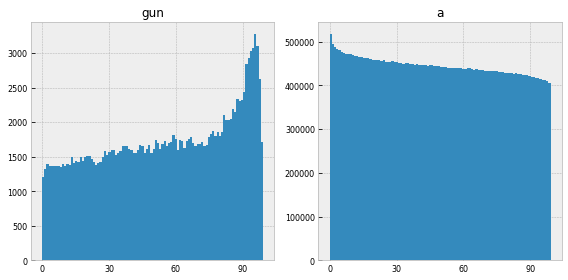

In [4]:
multiples(['gun', 'a'], cols=2)

In [30]:
def plot_tokens(tokens, title=None, w=8, h=8):
    
    plt.figure(figsize=(w, h))
            
    plt.axhline(1/100, c='black', lw=0.5, alpha=0.25)
    
    lines = []
    for token, pos in tokens:
        series = cache.token_series(token, pos=pos)
        line, = plt.plot(series / series.sum(), label=f'{token} ({pos})')
        lines.append(line)
        
    plt.legend(
        handles=lines,
        bbox_to_anchor=(1.03, 1),
        loc=2,
        borderaxespad=0,
    )
    
    if title:
        plt.title(title)
    
    plt.xlabel('Narrative time')
    plt.ylabel('Relative frequency')
    plt.show()

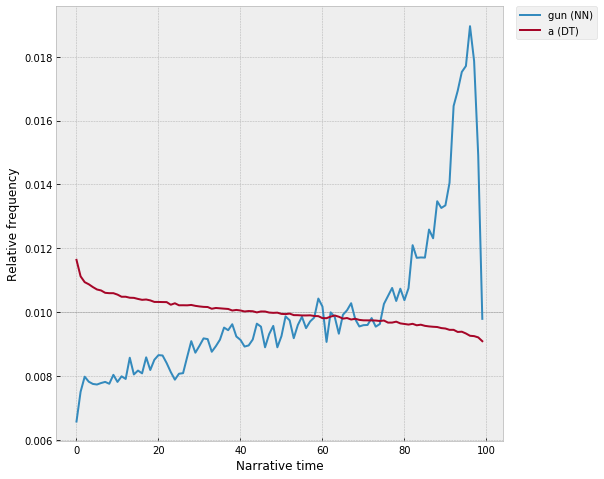

In [31]:
plot_tokens([('gun', 'NN'), ('a', 'DT')])

In [44]:
import math
import numpy as np

def plot_token(token, pos, corpus=None, title=None, w=5, h=5):
    
    series = cache.token_series(token, pos=pos, corpus=corpus)
    
    n = series.sum()
    p = 1 / len(series)
    
    mean = n * p
    var = mean * (1-p)
    std = math.sqrt(var)

    plt.figure(figsize=(w,h))
    
    plt.plot([0, 100], [mean, mean], c='orange', lw=0.5)

    plt.fill_between(
        range(101),
        mean + 2*std,
        mean - 2*std,
        color='black',
        alpha=0.1,
    )
    
    plt.title(title or f'{token} ({pos})')
    plt.xlabel('Narrative time')
    plt.xlabel('Word count')
    plt.plot(series)
    plt.show()

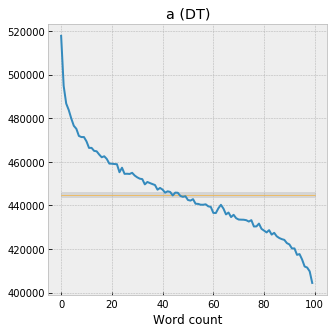

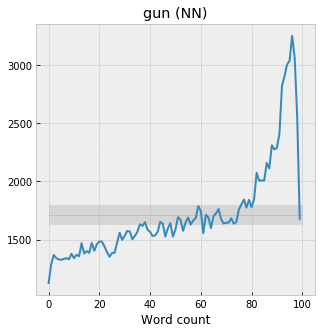

In [10]:
plot_token('a', 'DT')
plot_token('gun', 'NN')

In [22]:
def zscore_series(token, pos):
    
    series = cache.token_series(token, pos=pos)
    
    n = series.sum()
    p = 1 / len(series)
    
    mean = n * p
    var = mean * (1-p)
    std = math.sqrt(var)
    
    print(series - mean)
    return (series - mean) / std

In [23]:
np.set_printoptions(precision=3, suppress=True)

In [24]:
zscore_series('a', 'DT')

[ 72836.05  49864.05  41774.05  38804.05  34906.05  31555.05  30178.05
  26910.05  26388.05  26395.05  24407.05  21412.05  21434.05  20060.05
  19854.05  18384.05  17124.05  17574.05  16335.05  14212.05  14159.05
  14016.05  13937.05  10259.05  12320.05   9508.05   9558.05   9461.05
   9982.05   8738.05   7911.05   7297.05   7092.05   4677.05   5774.05
   5283.05   4815.05   4382.05   2243.05   3039.05   2264.05    876.05
   1505.05   1199.05   -396.95    905.05    828.05   -604.95  -1028.95
   -755.95  -2490.95  -2766.95  -2093.95  -4199.95  -4278.95  -4647.95
  -4667.95  -4467.95  -5399.95  -5654.95  -8406.95  -8479.95  -6291.95
  -4710.95  -6438.95  -9099.95  -8247.95 -10338.95  -9285.95 -10842.95
 -11455.95 -11515.95 -11551.95 -11762.95 -12381.95 -11742.95 -14644.95
 -14605.95 -13322.95 -15727.95 -16531.95 -17371.95 -16330.95 -18371.95
 -17558.95 -19148.95 -19937.95 -20444.95 -20792.95 -22265.95 -22878.95
 -24721.95 -24708.95 -27662.95 -27316.95 -29790.95 -32998.95 -33482.95
 -3524

array([ 109.741,   75.129,   62.94 ,   58.465,   52.592,   47.543,
         45.469,   40.545,   39.758,   39.769,   36.774,   32.261,
         32.294,   30.224,   29.914,   27.699,   25.8  ,   26.478,
         24.612,   21.413,   21.333,   21.118,   20.999,   15.457,
         18.562,   14.326,   14.401,   14.255,   15.04 ,   13.165,
         11.919,   10.994,   10.685,    7.047,    8.7  ,    7.96 ,
          7.255,    6.602,    3.38 ,    4.579,    3.411,    1.32 ,
          2.268,    1.807,   -0.598,    1.364,    1.248,   -0.911,
         -1.55 ,   -1.139,   -3.753,   -4.169,   -3.155,   -6.328,
         -6.447,   -7.003,   -7.033,   -6.732,   -8.136,   -8.52 ,
        -12.667,  -12.777,   -9.48 ,   -7.098,   -9.701,  -13.711,
        -12.427,  -15.577,  -13.991,  -16.337,  -17.26 ,  -17.351,
        -17.405,  -17.723,  -18.656,  -17.693,  -22.065,  -22.006,
        -20.073,  -23.697,  -24.908,  -26.174,  -24.606,  -27.681,
        -26.456,  -28.851,  -30.04 ,  -30.804,  -31.328,  -33.

In [25]:
zscore_series('gun', 'NN')

[ -588.16  -428.16  -347.16  -374.16  -386.16  -389.16  -381.16  -375.16
  -385.16  -337.16  -375.16  -345.16  -359.16  -245.16  -335.16  -314.16
  -329.16  -243.16  -311.16  -256.16  -231.16  -233.16  -274.16  -322.16
  -363.16  -331.16  -328.16  -241.16  -156.16  -218.16  -181.16  -141.16
  -145.16  -213.16  -183.16  -148.16   -83.16   -97.16   -65.16  -131.16
  -149.16  -185.16  -179.16  -147.16   -62.16   -78.16  -189.16  -118.16
   -74.16  -189.16  -129.16   -23.16   -44.16  -140.16   -69.16   -25.16
   -86.16   -50.16   -29.16    72.84    29.84  -160.16    -1.16   -26.16
  -116.16   -14.16     9.84    47.84   -38.16   -77.16   -70.16   -69.16
   -32.16   -78.16   -64.16    43.84    86.84   129.84    59.84   125.84
    63.84   128.84   359.84   291.84   293.84   292.84   443.84   396.84
   595.84   559.84   573.84   694.84  1107.84  1189.84  1290.84  1322.84
  1536.84  1349.84   842.84   -36.16]


array([-14.273, -10.39 ,  -8.425,  -9.08 ,  -9.371,  -9.444,  -9.25 ,
        -9.104,  -9.347,  -8.182,  -9.104,  -8.376,  -8.716,  -5.949,
        -8.134,  -7.624,  -7.988,  -5.901,  -7.551,  -6.216,  -5.61 ,
        -5.658,  -6.653,  -7.818,  -8.813,  -8.037,  -7.964,  -5.852,
        -3.79 ,  -5.294,  -4.396,  -3.426,  -3.523,  -5.173,  -4.445,
        -3.596,  -2.018,  -2.358,  -1.581,  -3.183,  -3.62 ,  -4.493,
        -4.348,  -3.571,  -1.508,  -1.897,  -4.59 ,  -2.867,  -1.8  ,
        -4.59 ,  -3.134,  -0.562,  -1.072,  -3.401,  -1.678,  -0.611,
        -2.091,  -1.217,  -0.708,   1.768,   0.724,  -3.887,  -0.028,
        -0.635,  -2.819,  -0.344,   0.239,   1.161,  -0.926,  -1.873,
        -1.703,  -1.678,  -0.78 ,  -1.897,  -1.557,   1.064,   2.107,
         3.151,   1.452,   3.054,   1.549,   3.127,   8.733,   7.082,
         7.131,   7.107,  10.771,   9.63 ,  14.46 ,  13.586,  13.926,
        16.862,  26.885,  28.875,  31.326,  32.102,  37.296,  32.758,
        20.454,  -0.

In [15]:
from scipy.spatial.distance import euclidean

def uniform_distance(token, pos):
    
    series = cache.token_series(token, pos=pos)
    series /= series.sum()
    
    mean = series.sum() / len(series)

    uniform = np.full(len(series), mean)
    
    return euclidean(series, uniform)

In [18]:
uniform_distance('gun', 'NN')

0.02417547406015744

In [16]:
uniform_distance('a', 'DT')

0.004324266104923795

In [21]:
uniform_distance('gun', 'NN') / uniform_distance('a', 'DT')

5.590653644702903

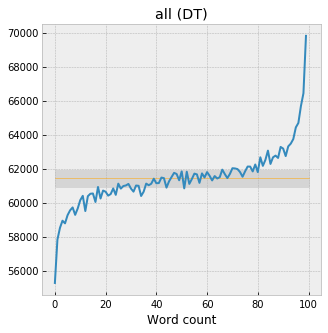

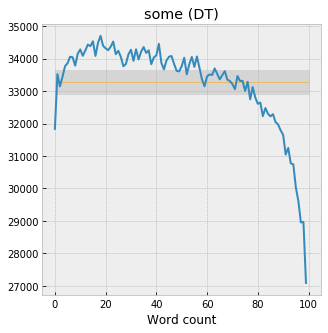

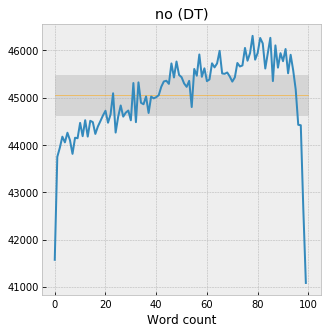

In [35]:
plot_token('all', 'DT')
plot_token('some', 'DT')
plot_token('no', 'DT')

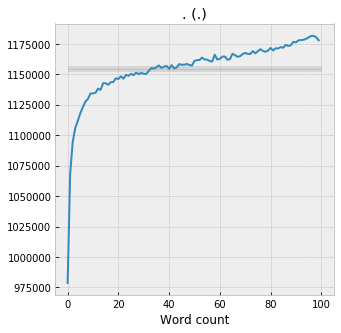

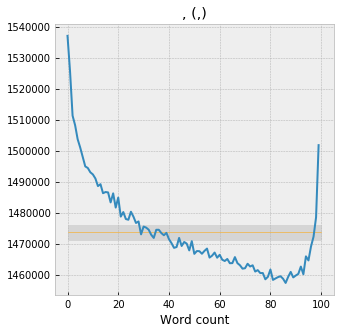

In [37]:
plot_token('.', '.')
plot_token(',', ',')

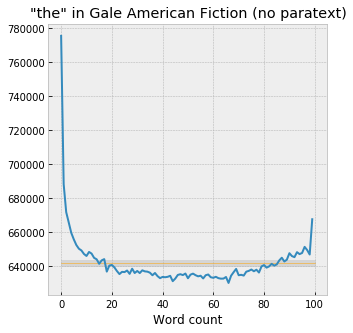

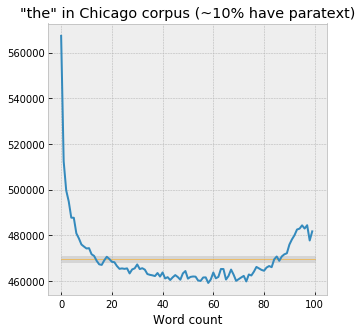

In [51]:
plot_token('the', 'DT', corpus='gale', title='"the" in Gale American Fiction (no paratext)')
plot_token('the', 'DT', corpus='chicago', title='"the" in Chicago corpus (~10% have paratext)')

________________________________________________________________________________
[Memory] Calling lint_analysis.bin_counts.models.token_series...
token_series('medium', pos='NN', corpus='gale')
_____________________________________________________token_series - 0.4s, 0.0min


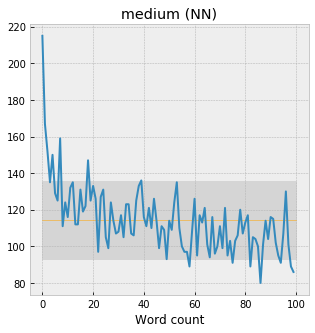

________________________________________________________________________________
[Memory] Calling lint_analysis.bin_counts.models.token_series...
token_series('medium', pos='NN', corpus='chicago')
_____________________________________________________token_series - 0.0s, 0.0min


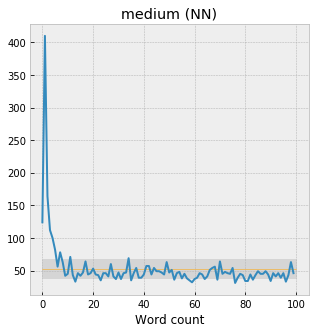

In [54]:
plot_token('medium', 'NN', corpus='gale')
plot_token('medium', 'NN', corpus='chicago')